In [1]:
import tensorflow as tf
import numpy as np

# 1- 데이터 불러오기

In [30]:
EPOCHS = 20
Batch_Size = 128
Shuffle = 1000
LR = 1e-4

In [68]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


## 2-입력데이터 전처리 - 평균값, 표준편차 넣어준다.

In [69]:
#정규화
X_mean = np.mean(X_train, axis=(0,1,2))
X_std = np.std(X_train, axis=(0,1,2))

X_train = (X_train - X_mean) /X_std
X_test = (X_test-X_mean) / X_std


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3)

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(13720, 32, 32, 3)
(5880, 32, 32, 3)
(13720, 1)
(5880, 1)


In [62]:
train_tf = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_tf = train_tf.shuffle(Shuffle).batch(32)

val_tf = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(128)

## CNN Model Build

In [70]:
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras import Model
from tensorflow.keras.regularizers import l2

def my_model():
    inputs = Input(shape=(32, 32, 3))
    x = Conv2D(32, (3,3), padding = 'same', activation = 'relu')(inputs)
    x = Conv2D(64, (3,3), padding = 'same', activation = 'relu')(x)

    x = MaxPool2D((2, 2))(x)
    x = Dropout(rate=0.5)(x)

    x = Conv2D(128, (3,3), padding='same', activation='relu')(x)
    x = Conv2D(256, (3,3), padding='valid', activation='relu')(x)

    x = MaxPool2D((2,2))(x)
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(rate=0.5)(x)
    x = Dense(10, activation = 'softmax')(x)

    model = Model(inputs = inputs, outputs = x)

    return model

model = my_model()



## 4- Loss Function & Optimizer

In [71]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

loss_object = SparseCategoricalCrossentropy()
optimizer = Adam()

In [75]:
from tensorflow.keras.metrics import Mean
from tensorflow.keras.metrics import SparseCategoricalAccuracy

train_loss = Mean(name='train_loss')
train_accuracy = SparseCategoricalAccuracy(name='train_accuracy')

val_loss = Mean(name='val_loss')
val_accuracy = SparseCategoricalAccuracy(name='val_accuracy')

## 5- Back Propagation 빌드

In [76]:
@tf.function
def train_step(images, lables):
    with tf.GradientTape() as tape:
        outputs = model(images, training = True)
        loss = loss_object(labels, outputs)

    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)
    train_accuracy(labels, outputs)

@tf.function
def val_step(images, labels):
    outputs = model(images, training=False)
    v_loss = loss_object(labels, outputs)

    val_loss(v_loss)
    val_accuracy(labels, outputs)

## 6. 학습하기 Training

In [79]:
for epoch in range(EPOCHS):
    train_loss.reset_states()
    train_accuracy.reset_states()
    val_loss.reset_states()
    val_accuracy.reset_states()

    for images, labels in train_tf:
        train_step(images, labels)

    for val_images, val_labels in val_tf:
        val_step(val_images, val_labels)
        
    print('Epoch: {:03d}, Train_loss: {:.3f}, Train_acc: {:.3%}, Val_loss: {:.3f}, Val_acc: {:.3%}'.format( 
        epoch + 1,
        train_loss.result(),
        train_accuracy.result(),
        val_loss.result(),
        val_accuracy.result()))

Epoch: 001, Train_loss: 2.170, Train_acc: 16.975%, Val_loss: 2.454, Val_acc: 9.762%
Epoch: 002, Train_loss: 2.171, Train_acc: 16.829%, Val_loss: 2.453, Val_acc: 9.422%
Epoch: 003, Train_loss: 2.171, Train_acc: 16.990%, Val_loss: 2.452, Val_acc: 9.762%
Epoch: 004, Train_loss: 2.171, Train_acc: 17.259%, Val_loss: 2.453, Val_acc: 9.762%
Epoch: 005, Train_loss: 2.171, Train_acc: 17.070%, Val_loss: 2.450, Val_acc: 9.762%
Epoch: 006, Train_loss: 2.171, Train_acc: 17.289%, Val_loss: 2.452, Val_acc: 9.422%
Epoch: 007, Train_loss: 2.171, Train_acc: 17.638%, Val_loss: 2.453, Val_acc: 9.762%
Epoch: 008, Train_loss: 2.171, Train_acc: 17.004%, Val_loss: 2.452, Val_acc: 9.762%
Epoch: 009, Train_loss: 2.171, Train_acc: 16.800%, Val_loss: 2.452, Val_acc: 9.762%
Epoch: 010, Train_loss: 2.171, Train_acc: 16.931%, Val_loss: 2.453, Val_acc: 9.762%
Epoch: 011, Train_loss: 2.171, Train_acc: 17.259%, Val_loss: 2.453, Val_acc: 9.422%
Epoch: 012, Train_loss: 2.171, Train_acc: 16.997%, Val_loss: 2.452, Val_acc:

In [80]:
c = "CBD"
d = "BACDE"
d.split(c[0])

['BA', 'DE']

In [ ]:

def solution(skill, skill_trees):
    answer = 0
    for i in range(len(skill)): 
        it = skill[i]
        new_arr = skill_trees.split(it)
        n1 = new_arr[0]
        n2 = new_arr[1]

        for j in range(len(n1)) :
            
    return answer

# Image Augmention

In [82]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

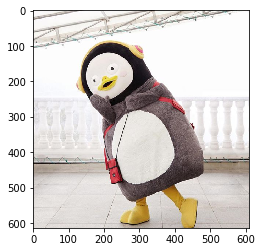

In [87]:
pangsoo = img_to_array(load_img('pangsoo.png')).astype(np.int64)
plt.imshow(pangsoo)
plt.show()

In [92]:
datagen = ImageDataGenerator(horizontal_flip=True,
                            vertical_flip=True,
                            zoom_range=0.4,
                            rotation_range=45,
                            shear_range=0.5,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            brightness_range=[0.7, 1.3],
                            fill_mode='nearest')

In [94]:
pangsoo = pangsoo.reshape((1,) + pangsoo.shape)
pangsoo.shape

(1, 614, 609, 3)

In [97]:
datagen

In [ ]:
pangsoo_gen=datagen.flow(pangsoo)
pangsoo_gen

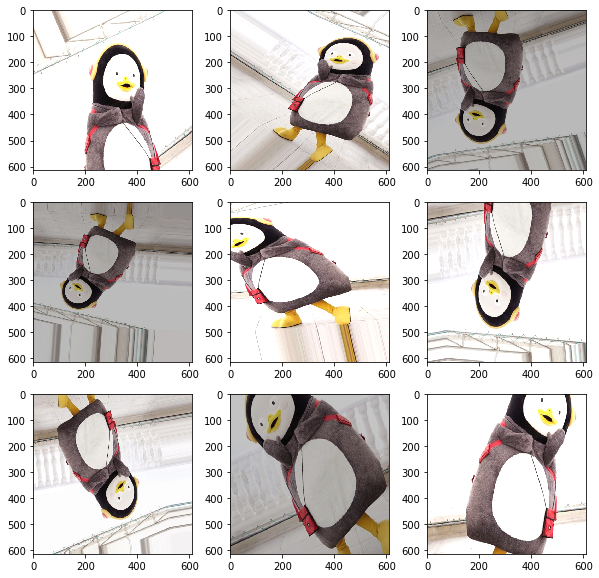

In [100]:
plt.figure(figsize=(10,10))

for i in range(9):
    data = next(pangsoo_gen)
    image=data[0]
    
    plt.subplot(3, 3, i+1)
    plt.imshow(np.array(image, dtype=np.int32))

In [ ]:
def step(trian_len,batch_size):
    if (train_len) % batch_size > 0:
        return train_len // batch_size + 1
    else:
        return train_len/ batch_size

# model.fit(train_data, epchos = 30,
#          step = , steps_per_epoch /or/ validation_steps = step(len(x_train),batch_size)